# We are Gonna Analyse and Prepare a model For predicting Whether customer will Churn or Not 

# Import necessary libraries



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_curve,roc_auc_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)



# Loading Dataset

In [2]:
df=pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
df.shape


(28382, 21)

In [4]:
len(df.customer_id.unique())

28382

- all Customers are Unique and There is No duplicates

In [5]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

- Lots of Null values can be seen in data 

# Data Imputing

In [6]:
df_c=df.copy()

- i like to keep my original different and do prprocessing with copies

In [7]:
df_c.gender.value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

- as we can see male and female population is closely same ,better just fill null values with new variable instead 

In [8]:
dict_gen={'Male': 0,
          'Female': 1}
df_c['gender']=df_c['gender'].map(dict_gen)



In [9]:
df_c['gender']=df_c.gender.fillna(-1)

In [10]:
df_c.gender.value_counts()

 0.0    16548
 1.0    11309
-1.0      525
Name: gender, dtype: int64

In [11]:
df_c.dependents.value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

- as we can most percentage of dependents is at zero so filling na with mode

In [12]:
dep_mode=df.dependents.mode()[0]
df_c['dependents']=df_c['dependents'].fillna(dep_mode)

In [13]:
df_c.dependents.isna().sum()

0

In [14]:
df_c.occupation.value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

- similarly most occupation is self employed so better just fill na with those

In [15]:
df_c.occupation=df_c.occupation.fillna(df_c.occupation.mode()[0])

In [16]:
df_c.occupation.isna().sum()

0

In [17]:
df_c.city.mode()

0    1020.0
Name: city, dtype: float64

- As we can see whats most repeated city ,better just fill na with those

In [18]:
df_c['city']=df_c['city'].fillna(df_c['city'].mode()[0])

In [19]:
df_c.city.isna().sum()

0

In [20]:
df_c.days_since_last_transaction.value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
309.0       1
225.0       1
183.0       1
92.0        1
334.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

- there is signifiantly large difference in value counts and lots of na value better just assign some huge values like 999

In [21]:
df_c.days_since_last_transaction=df_c.days_since_last_transaction.fillna(999)

In [22]:
df_c.days_since_last_transaction.isna().sum()

0

In [23]:
df_c.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

- All Na value as been sorted out

# Data preprocessing

- since there are more variables with discrete values in data we are gonna go with Logistic regeresion model
- For that we need to get data in numerical values with no catorigal data 

In [24]:
#changing occupation with get dummies into one not encode
df_c=pd.concat([df_c,pd.get_dummies(df_c['occupation'],prefix=str('occupation'),prefix_sep='_')],axis=1)

In [25]:
df_c.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,0.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,0.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,0.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


<AxesSubplot:>

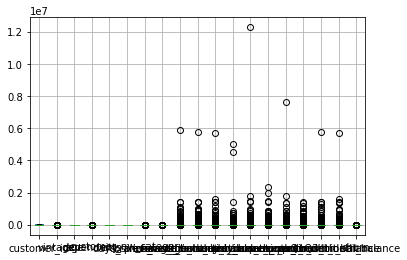

In [26]:
df.boxplot()

- as we can see multiple outliers are present in data ,so we gonna use log transformation to scale them down

In [27]:
df_c.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student'],
      dtype='object')

In [28]:
colm=['customer_nw_category', 'current_balance',
      'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
      'current_month_credit','previous_month_credit', 'current_month_debit', 
      'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in colm:
    df_c[i] = np.log(df_c[i] + 17000)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled=ss.fit_transform(df_c[colm])
df_scaled=pd.DataFrame(scaled,columns=colm)



In [29]:
df_c1=df_c.copy()
df_c1=df_c1.drop(columns=colm,axis=1)
df_c1=df_c1.merge(df_scaled,left_index=True,right_index=True,how='left')

In [30]:
df_c1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,0.0,0.0,self_employed,187.0,755,224.0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,0.0,0.0,self_employed,1020.0,3214,60.0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,0.0,0.0,salaried,146.0,41,999.0,0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1.0,0.0,self_employed,1020.0,582,147.0,1,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,0.0,2.0,self_employed,1494.0,388,58.0,1,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [31]:
df_c1.churn.value_counts()/len(df)*100

0    81.467127
1    18.532873
Name: churn, dtype: float64

- Target Data is not balanced logistic Model wont be able to perform well on its own

In [32]:
#Separating dependent and independant data
Y=df_c1.churn
X=df_c1.drop(['customer_id','occupation','churn'],axis=1)

- Spliting Data in Train and test

In [33]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=100)


# Model building

- As this is  classification Problem And data has mostly continuos values we first gonna try with Logistic Regressor classifier

In [34]:
LR=LogisticRegression()
model=LR.fit(train_x,train_y)
LR.score(test_x,test_y)

0.8287828078210322

In [35]:
train_pred=LR.predict(train_x)
test_pred=LR.predict(test_x)

In [36]:
cm=confusion_matrix
cm(test_y,test_pred)

array([[4487,  140],
       [ 832,  218]], dtype=int64)

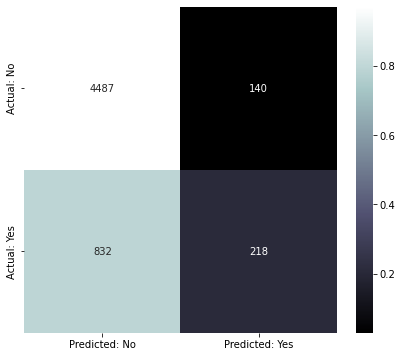

In [37]:
label_preds=test_pred
cm = confusion_matrix(test_y,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

- Gotta find optimium Threshold value since Default is at 0.5

# Thresholding 

In [38]:
n=[0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
train_recall_score=[]
test_recall_score=[]
train_accuracy_score=[]
test_accuracy_score=[]

for j in range(0,len(n)):
    train_pred=LR.predict_proba(train_x)[:,1]
    for i in range (0,len(train_pred)):
        if train_pred[i]<n[j]:
            train_pred[i]=0
        else:
            train_pred[i]=1
    test_pred=LR.predict_proba(test_x)[:,1]
    for i in range (0,len(test_pred)):
        if test_pred[i]<n[j]:
            test_pred[i]=0
        else:
            test_pred[i]=1
    train_recall_score.append(recall_score(train_y,train_pred))
    test_recall_score.append(recall_score(test_y,test_pred))
    train_accuracy_score.append(accuracy_score(train_y,train_pred))
    test_accuracy_score.append(accuracy_score(test_y,test_pred))
    
        

Text(0, 0.5, 'Accuracy & Recall')

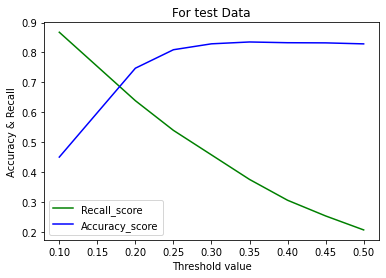

In [39]:

plt.plot(n,test_recall_score,color='g')
plt.plot(n,test_accuracy_score,color='b')
plt.title('For test Data')
plt.legend(('Recall_score','Accuracy_score'))
plt.xlabel('Threshold value')
plt.ylabel('Accuracy & Recall')


Text(0, 0.5, 'Accuracy & Recall')

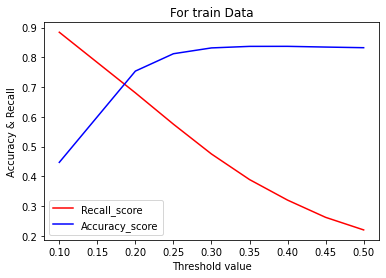

In [40]:
plt.plot(n,train_recall_score,color='r')
plt.plot(n,train_accuracy_score,color='b')
plt.title('For train Data')
plt.legend(('Recall_score','Accuracy_score'))
plt.xlabel('Threshold value')
plt.ylabel('Accuracy & Recall')


- As seen through graphs recall and accuracy seems to balance at 0.2 Threshold for btoh train and testing Data 

- Lets try with Validation set to see whether we can see difference

# Lets predict with Validation Set

In [41]:
from sklearn.model_selection import KFold

In [42]:
kf=KFold(n_splits=5,random_state=42,shuffle=True)
kf

    

KFold(n_splits=5, random_state=42, shuffle=True)

In [43]:
def Cv_Scores(mlmodel,threshold,cols):
    test_accuracy=np.array([])
    test_precision=np.array([])
    test_recall=np.array([])
    train_accuracy=np.array([])
    train_precision=np.array([])
    train_recall=np.array([])
    
   
    for train_index,test_index in kf.split(X[cols],Y):
        xtr,xts=X[cols].loc[train_index],X[cols].loc[test_index]
        ytr,yts=Y.loc[train_index],Y.loc[test_index]
        model=mlmodel
        model.fit(xtr,ytr)
        xtr_p=model.predict_proba(xtr)[:,1]
        xts_p=model.predict_proba(xts)[:,1]
        for i in range(0,len(xtr)):
            if xtr_p[i]<(threshold):
                xtr_p[i]=0
            else:
                xtr_p[i]=1
        for i in range(0,len(xts_p)):
            if xts_p[i]<(threshold):
                xts_p[i]=0
            else:
                xts_p[i]=1
        train_accuracy=np.append(train_accuracy,accuracy_score(ytr,xtr_p))
        train_precision=np.append(train_precision,precision_score(ytr,xtr_p))
        train_recall=np.append(train_recall,recall_score(ytr,xtr_p))
        test_accuracy=np.append(test_accuracy,accuracy_score(yts,xts_p))
        test_precision=np.append(test_precision,precision_score(yts,xts_p))
        test_recall=np.append(test_recall,recall_score(yts,xts_p))
    
    
    return train_accuracy.mean(),train_precision.mean(),train_recall.mean(),test_accuracy.mean(),test_precision.mean(),test_recall.mean(),
   

In [53]:
L_TraS=[]
L_TrpS=[]
L_TrrS=[]
L_TeaS=[]
L_TepS=[]
L_TerS=[]
for i in range(1,6):
    i=i/10
    L_Tra,L_Trp,L_Trr,L_Tea,L_Tep,L_Ter=Cv_Scores(LogisticRegression(),i,X.columns)
    L_TraS.append(L_Tra)
    L_TrpS.append(L_Trp)
    L_TrrS.append(L_Trr)
    L_TeaS.append(L_Tea)
    L_TepS.append(L_Tep)
    L_TerS.append(L_Ter)

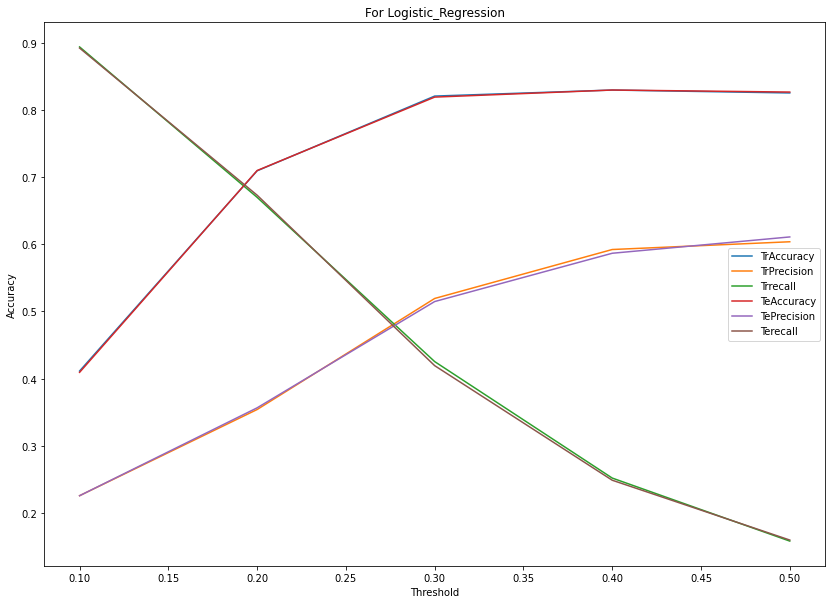

In [59]:
x=[0.1,0.2,0.3,0.4,0.5]
plt.figure(figsize=(14,10))
plt.plot(x,L_TraS)
plt.plot(x,L_TrpS)
plt.plot(x,L_TrrS)
plt.plot(x,L_TeaS)
plt.plot(x,L_TepS)
plt.plot(x,L_TerS)
plt.title("For Logistic_Regression")
plt.ylabel("Accuracy")
o=plt.xlabel('Threshold')
plt.legend(("TrAccuracy","TrPrecision","Trrecall","TeAccuracy","TePrecision","Terecall"))
plt.show()

- WE can Conclude that because of target Data being Heavly unbalaced Model is heavly biased ,Therefore for optimum Threshold should be choosen as demanded since recall and precision are traded with each other when changing threshold


# We can try using Backward Feature selection
- we use most features that affects the accuracy score
- We gonna use RFE ,Reverse feature elimination library to find out rank wise features affecting model

In [44]:
from sklearn.feature_selection import RFE
modl=LogisticRegression()
rfe=RFE(estimator=modl,n_features_to_select=1,step=1)
rfe.fit(X,Y)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [45]:
rfe.ranking_

array([22, 18, 13, 16, 21, 23, 20,  3, 15,  9,  8, 10, 14,  1, 17,  4,  2,
       12, 19,  7, 11,  5,  6])

In [46]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = X.columns
ranking_df['Rank'] = rfe.ranking_

In [47]:
ranking_df.sort_values(by='Rank',inplace=True)

In [48]:
cols=ranking_df['Feature_name'][:10]
cols

13                   current_balance
16     average_monthly_balance_prevQ
7                 occupation_company
15    average_monthly_balance_prevQ2
21             current_month_balance
22            previous_month_balance
19               current_month_debit
10          occupation_self_employed
9                occupation_salaried
11                occupation_student
Name: Feature_name, dtype: object

In [60]:
L_TraS=[]
L_TrpS=[]
L_TrrS=[]
L_TeaS=[]
L_TepS=[]
L_TerS=[]
for i in range(1,6):
    i=i/10
    L_Tra,L_Trp,L_Trr,L_Tea,L_Tep,L_Ter=Cv_Scores(LogisticRegression(),i,cols)
    L_TraS.append(L_Tra)
    L_TrpS.append(L_Trp)
    L_TrrS.append(L_Trr)
    L_TeaS.append(L_Tea)
    L_TepS.append(L_Tep)
    L_TerS.append(L_Ter)

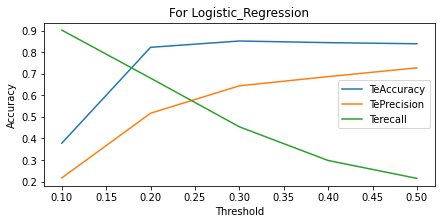

In [62]:
x=[0.1,0.2,0.3,0.4,0.5]
plt.figure(figsize=(7,3))
plt.plot(x,L_TeaS)
plt.plot(x,L_TepS)
plt.plot(x,L_TerS)
plt.title("For Logistic_Regression")
plt.ylabel("Accuracy")
o=plt.xlabel('Threshold')
plt.legend(("TeAccuracy","TePrecision","Terecall"))
plt.show()


- We can Little bit better accuracy at 0.2 compared to previous all columns prediction

# Lets try with Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

- Need to get optimum Max depth First

In [63]:
D_TraS=[]
D_TrpS=[]
D_TrrS=[]
D_TeaS=[]
D_TepS=[]
D_TerS=[]
for i in range (1,6):
    D_Tra,D_Trp,D_Trr,D_Tea,D_Tep,D_Ter=Cv_Scores(DecisionTreeClassifier(max_depth=i),0.5,X.columns)
    D_TraS.append(D_Tra)
    D_TrpS.append(D_Trp)
    D_TrrS.append(D_Trr)
    D_TeaS.append(D_Tea)
    D_TepS.append(D_Tep)
    D_TerS.append(D_Ter)

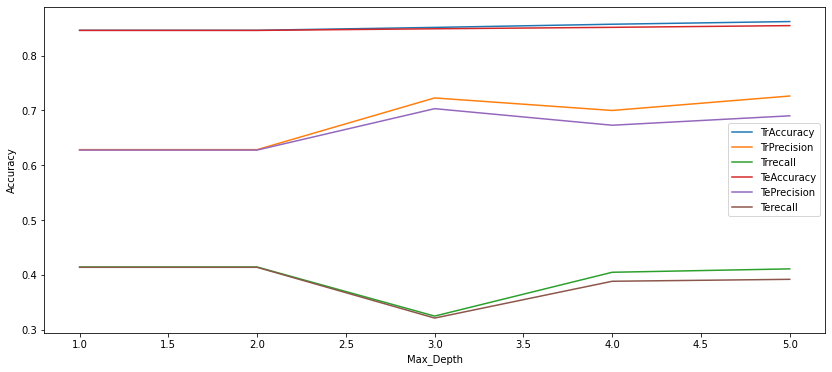

In [64]:
plt.figure(figsize=(14,6))
plt.plot(range(1,6),D_TraS)
plt.plot(range(1,6),D_TrpS)
plt.plot(range(1,6),D_TrrS)
plt.plot(range(1,6),D_TeaS)
plt.plot(range(1,6),D_TepS)
plt.plot(range(1,6),D_TerS)

plt.ylabel("Accuracy")
o=plt.xlabel('Max_Depth')
plt.legend(("TrAccuracy","TrPrecision","Trrecall","TeAccuracy","TePrecision","Terecall"))
plt.show()

- As we see at max depth = 3 we see depth in recall and growth i precision,best result is seem to be at depth 1 or 2 since at  both point we see constant line

# lets compare logistic and decision tree  at different Threshold

In [65]:
D_TraS=[]
D_TrpS=[]
D_TrrS=[]
D_TeaS=[]
D_TepS=[]
D_TerS=[]
for i in range (1,6):
    i=i/10
    D_Tra,D_Trp,D_Trr,D_Tea,D_Tep,D_Ter=Cv_Scores(DecisionTreeClassifier(max_depth=2),i,X.columns)
    D_TraS.append(D_Tra)
    D_TrpS.append(D_Trp)
    D_TrrS.append(D_Trr)
    D_TeaS.append(D_Tea)
    D_TepS.append(D_Tep)
    D_TerS.append(D_Ter)

In [66]:
L_TraS=[]
L_TrpS=[]
L_TrrS=[]
L_TeaS=[]
L_TepS=[]
L_TerS=[]
for i in range(1,6):
    i=i/10
    L_Tra,L_Trp,L_Trr,L_Tea,L_Tep,L_Ter=Cv_Scores(LogisticRegression(),i,X.columns)
    L_TraS.append(L_Tra)
    L_TrpS.append(L_Trp)
    L_TrrS.append(L_Trr)
    L_TeaS.append(L_Tea)
    L_TepS.append(L_Tep)
    L_TerS.append(L_Ter)

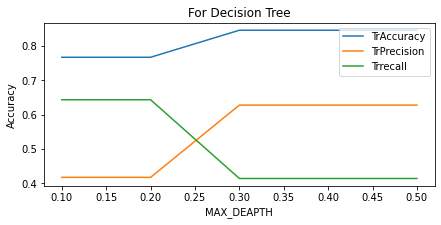

In [67]:
x=[0.1,0.2,0.3,0.4,0.5]
plt.figure(figsize=(7,3))
plt.plot(x,D_TeaS)
plt.plot(x,D_TepS)
plt.plot(x,D_TerS)
plt.ylabel("Accuracy")
plt.title("For Decision Tree")
plt.xlabel('MAX_DEAPTH')
plt.legend(("TrAccuracy","TrPrecision","Trrecall","TeAccuracy","TePrecision","Terecall"))
plt.show()

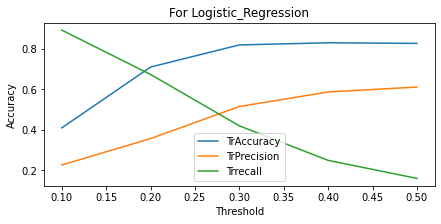

In [68]:
x=[0.1,0.2,0.3,0.4,0.5]
plt.figure(figsize=(7,3))
plt.plot(x,L_TeaS)
plt.plot(x,L_TepS)
plt.plot(x,L_TerS)
plt.title("For Logistic_Regression")
plt.ylabel("Accuracy")
o=plt.xlabel('Threshold')
plt.legend(("TrAccuracy","TrPrecision","Trrecall","TeAccuracy","TePrecision","Terecall"))
plt.show()


- As We can see Both falls Around 0.2 Threshold both models gives best recall and Accuracy

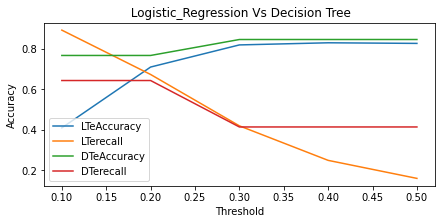

In [69]:

plt.figure(figsize=(7,3))
plt.plot(x,L_TeaS)
plt.plot(x,L_TerS)
plt.plot(x,D_TeaS)
plt.plot(x,D_TerS)

plt.title(" Logistic_Regression Vs Decision Tree")
plt.ylabel("Accuracy")
o=plt.xlabel('Threshold')
plt.legend(("LTeAccuracy","LTerecall","DTeAccuracy","DTerecall"))
plt.show()

- As can be seen Logistic Trades off with accuarcy too fro recall increase at 0.2 threshold
- similar behaviour can be seen with  Decision tree shows Fall of recall after 0.2 Threshold and rise of Accuracy 

# Lets Check with Top 10 columns we choose 

In [70]:
D_TraS=[]
D_TrpS=[]
D_TrrS=[]
D_TeaS=[]
D_TepS=[]
D_TerS=[]
for i in range (1,6):
    
    D_Tra,D_Trp,D_Trr,D_Tea,D_Tep,D_Ter=Cv_Scores(DecisionTreeClassifier(max_depth=i),0.5,cols)
    D_TraS.append(D_Tra)
    D_TrpS.append(D_Trp)
    D_TrrS.append(D_Trr)
    D_TeaS.append(D_Tea)
    D_TepS.append(D_Tep)
    D_TerS.append(D_Ter)

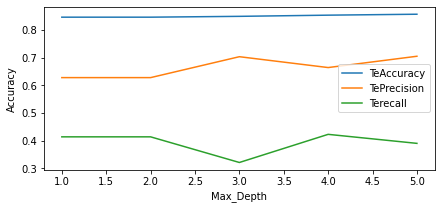

In [71]:
plt.figure(figsize=(7,3))

plt.plot(range(1,6),D_TeaS)
plt.plot(range(1,6),D_TepS)
plt.plot(range(1,6),D_TerS)

plt.ylabel("Accuracy")
o=plt.xlabel('Max_Depth')
plt.legend(("TeAccuracy","TePrecision","Terecall"))
plt.show()


In [72]:
D_TraS=[]
D_TrpS=[]
D_TrrS=[]
D_TeaS=[]
D_TepS=[]
D_TerS=[]
for i in range (1,6):
    i=i/10
    D_Tra,D_Trp,D_Trr,D_Tea,D_Tep,D_Ter=Cv_Scores(DecisionTreeClassifier(max_depth=2),i,cols)
    D_TraS.append(D_Tra)
    D_TrpS.append(D_Trp)
    D_TrrS.append(D_Trr)
    D_TeaS.append(D_Tea)
    D_TepS.append(D_Tep)
    D_TerS.append(D_Ter)

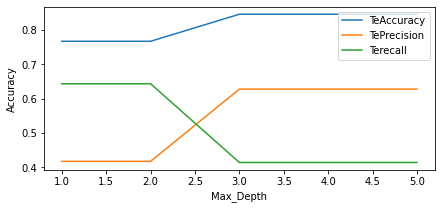

In [73]:
plt.figure(figsize=(7,3))

plt.plot(range(1,6),D_TeaS)
plt.plot(range(1,6),D_TepS)
plt.plot(range(1,6),D_TerS)

plt.ylabel("Accuracy")
o=plt.xlabel('Max_Depth')
plt.legend(("TeAccuracy","TePrecision","Terecall"))
plt.show()

- We can Conclude That Getting top !0 calsses gives little better for Logistic Regressor but for Decision Tree there isnt much Difference
